<a href="https://colab.research.google.com/github/shivanishridhar/Data-Science-Engineering-Methods/blob/main/022770631_Shivani_Gole_Assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Applying XGBoost algorithm on the Boston housing dataset to predict the median value. 
#Do the usual train/test split and then compare the result with the result of applying linear regression. 
#You can use a suitable metric like RMSE.

In [ ]:
#Name : Shivani Shridhar Gole
#NUID : 0022770631

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from xgboost import plot_tree
from sklearn.linear_model import LinearRegression

In [ ]:
#Loading dataset
boston_housing = pd.read_excel('/content/boston housing.xls')
boston_housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67,22.400000
502,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08,20.600000
503,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64,23.900000
504,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48,22.000000


In [ ]:
boston_housing.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


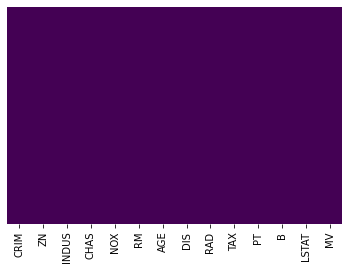

In [ ]:
#plotting heatmap
sns.heatmap(boston_housing.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#Drop MV for X and keep MV for Y
X = boston_housing.drop('MV', axis=1)
Y = boston_housing['MV']

In [ ]:
#Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
#Fit the model in XGBoost
xgb_regressor = XGBRegressor(learning_rate=0.1, max_depth = 5, objective ='reg:linear', alpha = 4)
xgb_regressor.fit(X_train, y_train)

[03:08:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=4, max_depth=5)

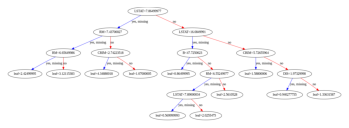

<Figure size 1080x288 with 0 Axes>

<Figure size 432x576 with 0 Axes>

In [ ]:
#Plot
plot_tree(xgb_regressor)
plt.figure().set_figwidth(15)
plt.figure().set_figheight(8)
plt.show()

In [ ]:
pred_value = xgb_regressor.predict(X_test)

In [ ]:
#Calculating RMSE
rmse_xbg_regressor = np.sqrt(mean_squared_error(y_test, pred_value))
accuracy_xgb_regressor = r2_score(y_test, pred_value)
print('Metrics for XGBoost')
print('----------------------------------')
print("RMSE of XGBoost Regressor is: %f" % (rmse_xbg_regressor))
print("Accuracy of XGBoost Regressor is %.2f%%" % (accuracy_xgb_regressor * 100.0))

Metrics for XGBoost
----------------------------------
RMSE of XGBoost Regressor is: 2.869217
Accuracy of XGBoost Regressor is 88.24%


In [ ]:
#Median prediction
median_prediction = np.median(pred_value)
print('Median prediction:', median_prediction)

Median prediction: 20.819546


In [ ]:
#Implementing Linear Regression on boston_housing dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
lin_regression = LinearRegression()
lin_regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred_value1 = lin_regression.predict(X_test)

In [ ]:
rmse_lin_regression = np.sqrt(mean_squared_error(y_test, pred_value1))
accuracy_lin_regression = r2_score(y_test, pred_value1)
print('Metrics for Linear Regression')
print('----------------------------------')
print("RMSE of Linear Regression model is: %f" % (rmse_lin_regression))
print("Accuracy of Linear Regression is %.2f%%" % (accuracy_lin_regression * 100.0))

Metrics for Linear Regression
----------------------------------
RMSE of Linear Regression model is: 4.700925
Accuracy of Linear Regression is 68.44%
